In [1]:
import pandas as pd
import numpy as np

In [2]:
comp = pd.read_csv('comp.csv', encoding = 'cp949')

In [3]:
comp.shape

(9063, 474)

In [4]:
comp['창업성공등급'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [5]:
comp[['창업성공등급']].value_counts()

창업성공등급
A         1850
B         1847
E         1840
C         1804
D         1722
Name: count, dtype: int64

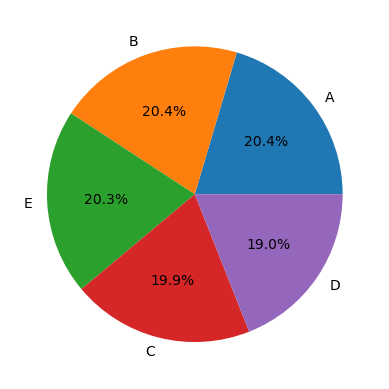

In [7]:
import matplotlib.pyplot as plt
temp = comp['창업성공등급'].value_counts()
plt.pie(temp.values, labels=temp.index.values, autopct='%1.1f%%')

plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
encoder = LabelEncoder()
comp['target'] = encoder.fit_transform(comp['창업성공등급'])

print(encoder.classes_)  # 클래스 확인

['A' 'B' 'C' 'D' 'E']


In [55]:
comp[['target']].value_counts()

target
0         1850
1         1847
4         1840
2         1804
3         1722
Name: count, dtype: int64

In [56]:
comp = comp.drop('창업성공등급', axis = 1)

In [57]:
comp.shape

(9063, 474)

In [58]:
X = comp.drop('target', axis = 1)
y = comp[['target']]

In [59]:
X.shape, y.shape

((9063, 473), (9063, 1))

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [294]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.4, random_state=0)
# 데이터 수가 많지 않기 때문에 valid set을 많이

In [295]:
X_train.shape, X_valid.shape, X_test.shape

((4350, 473), (2900, 473), (1813, 473))

In [296]:
X_train.shape[0]/X.shape[0], X_valid.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0]

(0.4799735187024164, 0.31998234580161095, 0.20004413549597264)

In [297]:
n_features = X.shape[1]

In [298]:
import tensorflow as tf

In [299]:
def base_model():
    initializer = tf.keras.initializers.HeNormal(seed = 42)
    inputs = tf.keras.layers.Input(shape=(n_features,))
    x1 = tf.keras.layers.Dense(255, activation = 'relu', kernel_initializer=initializer)(inputs)
    x2 = tf.keras.layers.Dense(125, activation = 'relu', kernel_initializer=initializer)(x1)
    outputs = tf.keras.layers.Dense(5, activation = 'softmax')(x2)
    model = tf.keras.Model(inputs, outputs, name = 'base_model')
    return model

In [300]:
model_1 = base_model()

In [301]:
model_1.summary()

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 473)]             0         
                                                                 
 dense_145 (Dense)           (None, 255)               120870    
                                                                 
 dense_146 (Dense)           (None, 125)               32000     
                                                                 
 dense_147 (Dense)           (None, 5)                 630       
                                                                 
Total params: 153,500
Trainable params: 153,500
Non-trainable params: 0
_________________________________________________________________


In [302]:
model_1.compile(optimizer = 'Adam',
                loss = 'sparse_categorical_crossentropy', # 타겟이 0, 1, 2 정수로 인코딩되어 있으므로
                metrics=['accuracy']) 

In [303]:
hist=model_1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50)

Epoch 1/50
136/136 [==============================] - 1s 7ms/step - loss: 1.1141 - accuracy: 0.5462 - val_loss: 0.7245 - val_accuracy: 0.7345
Epoch 2/50
136/136 [==============================] - 1s 5ms/step - loss: 0.5434 - accuracy: 0.8011 - val_loss: 0.4434 - val_accuracy: 0.8390
Epoch 3/50
136/136 [==============================] - 1s 5ms/step - loss: 0.3410 - accuracy: 0.8876 - val_loss: 0.3461 - val_accuracy: 0.8648
Epoch 4/50
136/136 [==============================] - 1s 5ms/step - loss: 0.2379 - accuracy: 0.9225 - val_loss: 0.2753 - val_accuracy: 0.8852
Epoch 5/50
136/136 [==============================] - 1s 4ms/step - loss: 0.1863 - accuracy: 0.9434 - val_loss: 0.2750 - val_accuracy: 0.8831
Epoch 6/50
136/136 [==============================] - 1s 5ms/step - loss: 0.1213 - accuracy: 0.9655 - val_loss: 0.2584 - val_accuracy: 0.8886
Epoch 7/50
136/136 [==============================] - 1s 4ms/step - loss: 0.1061 - accuracy: 0.9706 - val_loss: 0.2788 - val_accuracy: 0.8886
Epoch 

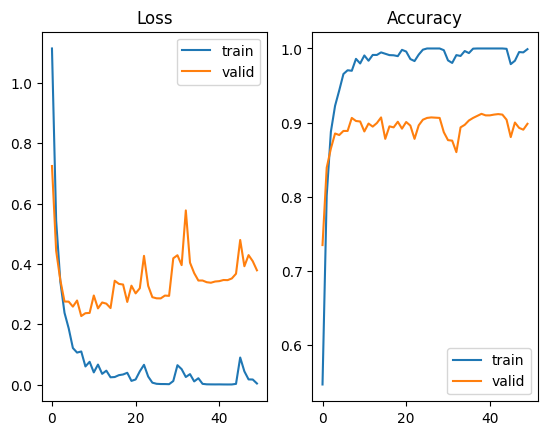

In [304]:
from matplotlib import pyplot as plt
plt.subplot(121)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='valid')
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [305]:
# epoch = 10 이전에 과적합 발생

In [306]:
## 층을 더 늘리고 l2 규제, 배치 정규화 드롭아웃 적용

In [538]:
regularizer=tf.keras.regularizers.l2(0.001)

In [553]:
def base_model2():
    initializer = tf.keras.initializers.HeNormal(seed = 42)
    
    inputs = tf.keras.layers.Input(shape=(n_features,))
    
#    x = tf.keras.layers.Dense(255, kernel_regularizer = regularizer, kernel_initializer=initializer)(inputs)
#    x = tf.keras.layers.BatchNormalization()(x)
#    x = tf.keras.layers.Activation('relu')(x)
#    x = tf.keras.layers.Dropout(0.1)(x)
    
#    x = tf.keras.layers.Dense(125, kernel_regularizer = regularizer, kernel_initializer=initializer)(x)
#    x = tf.keras.layers.BatchNormalization()(x)
#    x = tf.keras.layers.Activation('relu')(x)
#    x = tf.keras.layers.Dropout(0.1)(x)
    
    x = tf.keras.layers.Dense(61, kernel_regularizer = regularizer, kernel_initializer=initializer)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
#    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(16, kernel_regularizer = regularizer, kernel_initializer=initializer)(x)    
    outputs = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    
    model = tf.keras.Model(inputs, outputs, name = 'base_model2')
    return model

In [558]:
def base_model3():
    initializer = tf.keras.initializers.HeNormal(seed = 42)
    
    inputs = tf.keras.layers.Input(shape=(n_features,))
    
#    x = tf.keras.layers.Dense(255, kernel_regularizer = regularizer, kernel_initializer=initializer)(inputs)
#    x = tf.keras.layers.BatchNormalization()(x)
#    x = tf.keras.layers.Activation('relu')(x)
#    x = tf.keras.layers.Dropout(0.2)(x)

   # x = tf.keras.layers.Dense(125, kernel_regularizer = regularizer, kernel_initializer=initializer)(x)
   # x = tf.keras.layers.BatchNormalization()(x)
   # x = tf.keras.layers.Activation('relu')(x)
    
    #x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.Dense(61, kernel_regularizer = regularizer, kernel_initializer=initializer)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    # 데이터 수가 적기 때문에 드롭아웃 추가 시, 정확도 train set이 valid set 성능보다 떨어질 수 있으므로 조금만 적용
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(16, kernel_regularizer = regularizer, kernel_initializer=initializer)(x)
    outputs = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    
    model = tf.keras.Model(inputs, outputs, name = 'base_model3')
    return model

In [554]:
model_2 = base_model2()

In [555]:
model_2.compile(optimizer = 'Adam',  loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

In [556]:
hist2=model_2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50)

Epoch 1/50
136/136 [==============================] - 2s 8ms/step - loss: 1.4564 - accuracy: 0.4223 - val_loss: 1.1996 - val_accuracy: 0.5721
Epoch 2/50
136/136 [==============================] - 1s 6ms/step - loss: 0.9150 - accuracy: 0.6641 - val_loss: 0.8624 - val_accuracy: 0.7210
Epoch 3/50
136/136 [==============================] - 1s 7ms/step - loss: 0.6874 - accuracy: 0.7614 - val_loss: 0.6822 - val_accuracy: 0.7862
Epoch 4/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5921 - accuracy: 0.7906 - val_loss: 0.5562 - val_accuracy: 0.8255
Epoch 5/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5410 - accuracy: 0.8216 - val_loss: 0.4897 - val_accuracy: 0.8462
Epoch 6/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5034 - accuracy: 0.8237 - val_loss: 0.4738 - val_accuracy: 0.8514
Epoch 7/50
136/136 [==============================] - 1s 6ms/step - loss: 0.4868 - accuracy: 0.8343 - val_loss: 0.4571 - val_accuracy: 0.8503
Epoch 

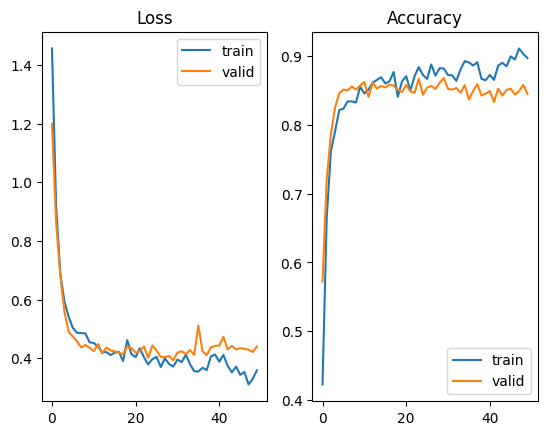

In [557]:
plt.subplot(121)
plt.title('Loss')
plt.plot(hist2.history['loss'], label='train')
plt.plot(hist2.history['val_loss'], label='valid')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist2.history['accuracy'], label='train')
plt.plot(hist2.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [559]:
model_3 = base_model3()
model_3.compile(optimizer = 'Adam',  loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

In [560]:
hist3=model_3.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50)

Epoch 1/50
136/136 [==============================] - 2s 8ms/step - loss: 1.4896 - accuracy: 0.3926 - val_loss: 1.2581 - val_accuracy: 0.5500
Epoch 2/50
136/136 [==============================] - 1s 7ms/step - loss: 1.0288 - accuracy: 0.5903 - val_loss: 0.8937 - val_accuracy: 0.7545
Epoch 3/50
136/136 [==============================] - 1s 6ms/step - loss: 0.7826 - accuracy: 0.6956 - val_loss: 0.6929 - val_accuracy: 0.7862
Epoch 4/50
136/136 [==============================] - 1s 6ms/step - loss: 0.7030 - accuracy: 0.7274 - val_loss: 0.5889 - val_accuracy: 0.8359
Epoch 5/50
136/136 [==============================] - 1s 6ms/step - loss: 0.6531 - accuracy: 0.7437 - val_loss: 0.5425 - val_accuracy: 0.8424
Epoch 6/50
136/136 [==============================] - 1s 6ms/step - loss: 0.6253 - accuracy: 0.7609 - val_loss: 0.4974 - val_accuracy: 0.8483
Epoch 7/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5956 - accuracy: 0.7811 - val_loss: 0.5095 - val_accuracy: 0.8259
Epoch 

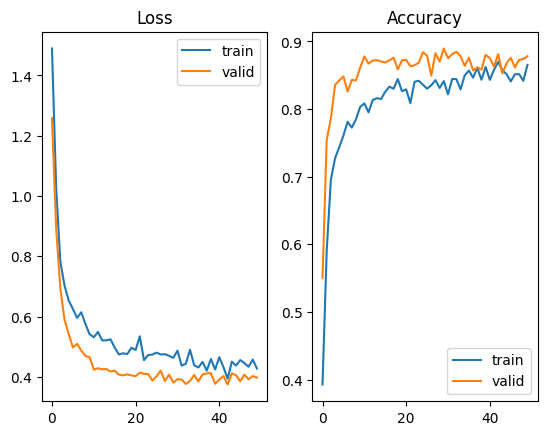

In [561]:
plt.subplot(121)
plt.title('Loss')
plt.plot(hist3.history['loss'], label='train')
plt.plot(hist3.history['val_loss'], label='valid')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist3.history['accuracy'], label='train')
plt.plot(hist3.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [317]:
## 활성화 함수 leakyrelu로 변경, 드롭아웃은 사용 x

In [589]:
def base_model4():
    initializer = tf.keras.initializers.HeNormal(seed = 42)
    
    inputs = tf.keras.layers.Input(shape=(n_features,))
    x = tf.keras.layers.Dense(61, kernel_regularizer = regularizer, kernel_initializer=initializer)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha = 0.2)(x)
    x = tf.keras.layers.Dense(16, kernel_regularizer = regularizer, kernel_initializer=initializer)(x)    
    outputs = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    
    model = tf.keras.Model(inputs, outputs, name = 'base_model4')
    return model

In [590]:
model_4 = base_model4()
model_4.compile(optimizer = 'Adam',  loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

In [591]:
hist4=model_4.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50)

Epoch 1/50
136/136 [==============================] - 2s 8ms/step - loss: 1.3644 - accuracy: 0.4503 - val_loss: 1.1598 - val_accuracy: 0.5893
Epoch 2/50
136/136 [==============================] - 1s 6ms/step - loss: 0.8547 - accuracy: 0.6929 - val_loss: 0.8360 - val_accuracy: 0.7334
Epoch 3/50
136/136 [==============================] - 1s 6ms/step - loss: 0.6796 - accuracy: 0.7664 - val_loss: 0.6394 - val_accuracy: 0.8103
Epoch 4/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5943 - accuracy: 0.7959 - val_loss: 0.5495 - val_accuracy: 0.8372
Epoch 5/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5321 - accuracy: 0.8230 - val_loss: 0.5082 - val_accuracy: 0.8448
Epoch 6/50
136/136 [==============================] - 1s 6ms/step - loss: 0.5282 - accuracy: 0.8147 - val_loss: 0.4976 - val_accuracy: 0.8390
Epoch 7/50
136/136 [==============================] - 1s 6ms/step - loss: 0.4977 - accuracy: 0.8195 - val_loss: 0.4774 - val_accuracy: 0.8397
Epoch 

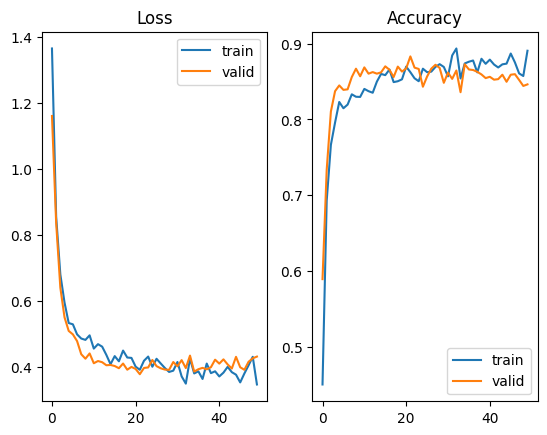

In [592]:
plt.subplot(121)
plt.title('Loss')
plt.plot(hist4.history['loss'], label='train')
plt.plot(hist4.history['val_loss'], label='valid')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist4.history['accuracy'], label='train')
plt.plot(hist4.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [593]:
## epoch을 더 길게 + 조기 종료

In [638]:
# 학습이 끝난 후, 모델의 가중치 중 가장 좋았을 때의 가중치로 복원
# False면 마지막 시점의 가중치가 적용된다.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',  
                                                  patience=30, 
                                                  mode = 'min', restore_best_weights=True) 

In [639]:
model_4 = base_model4()
model_4.compile(optimizer = 'Adam',  loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

In [640]:
hist4=model_4.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stopping])

Epoch 1/100
136/136 [==============================] - 1s 7ms/step - loss: 1.3136 - accuracy: 0.4777 - val_loss: 1.1011 - val_accuracy: 0.6521
Epoch 2/100
136/136 [==============================] - 1s 6ms/step - loss: 0.7993 - accuracy: 0.7101 - val_loss: 0.8165 - val_accuracy: 0.7083
Epoch 3/100
136/136 [==============================] - 1s 6ms/step - loss: 0.6496 - accuracy: 0.7805 - val_loss: 0.6043 - val_accuracy: 0.8338
Epoch 4/100
136/136 [==============================] - 1s 6ms/step - loss: 0.5715 - accuracy: 0.8002 - val_loss: 0.5103 - val_accuracy: 0.8572
Epoch 5/100
136/136 [==============================] - 1s 6ms/step - loss: 0.5338 - accuracy: 0.8147 - val_loss: 0.4811 - val_accuracy: 0.8531
Epoch 6/100
136/136 [==============================] - 1s 6ms/step - loss: 0.5199 - accuracy: 0.8159 - val_loss: 0.4512 - val_accuracy: 0.8593
Epoch 7/100
136/136 [==============================] - 1s 6ms/step - loss: 0.5001 - accuracy: 0.8232 - val_loss: 0.4592 - val_accuracy: 0.8434

Epoch 58/100
136/136 [==============================] - 1s 6ms/step - loss: 0.3338 - accuracy: 0.9000 - val_loss: 0.3958 - val_accuracy: 0.8590


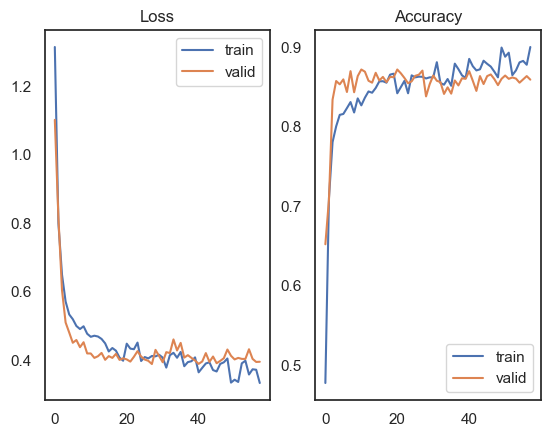

In [641]:
plt.subplot(121)
plt.title('Loss')
plt.plot(hist4.history['loss'], label='train')
plt.plot(hist4.history['val_loss'], label='valid')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist4.history['accuracy'], label='train')
plt.plot(hist4.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [642]:
score=model_4.evaluate(X_test,y_test)
print('%s: %.2f%%' %(model_4.metrics_names[1],score[1]*100))

57/57 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8632
accuracy: 86.32%


In [643]:
model_4.save('model_4.h5')

In [644]:
model = keras.models.load_model('model_4.h5')

In [645]:
model.summary()

Model: "base_model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_108 (InputLayer)      [(None, 473)]             0         
                                                                 
 dense_410 (Dense)           (None, 61)                28914     
                                                                 
 batch_normalization_279 (Ba  (None, 61)               244       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 61)                0         
                                                                 
 dense_411 (Dense)           (None, 16)                992       
                                                                 
 dense_412 (Dense)           (None, 5)                 85        
                                                       

In [646]:
y_pred = model.predict(X_test)
print(y_pred[0])

57/57 [==============================] - 0s 1ms/step
[9.3506235e-01 6.4933799e-02 3.8700923e-06 4.9768295e-13 2.4584441e-23]


In [647]:
from tensorflow.keras.utils import to_categorical

y_test_one_hot = to_categorical(y_test)
y_test_one_hot.shape, y_pred.shape

((1813, 5), (1813, 5))

In [648]:
y_test_one_hot

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [649]:
np.argmax(y_test_one_hot, axis = 1)

array([0, 1, 3, ..., 0, 0, 3], dtype=int64)

In [650]:
np.argmax(y_pred, axis=1)

array([0, 2, 3, ..., 0, 0, 3], dtype=int64)

In [651]:
y_true = np.argmax(y_test_one_hot, axis=1)  
y_pred_classes = np.argmax(y_pred, axis=1)  

print('y_true[:10]:', y_true[:10])  # 첫 10개 실제 클래스
print('y_pred_classes[:10]:', y_pred_classes[:10])  # 첫 10개 예측 클래스

y_true[:10]: [0 1 3 4 2 2 0 2 1 0]
y_pred_classes[:10]: [0 2 3 4 2 2 0 2 1 0]


In [652]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


[[348  19   0   0   0]
 [ 38 301  25   0   0]
 [  0  34 287  36   0]
 [  0   0  31 277  46]
 [  0   0   0  19 352]]


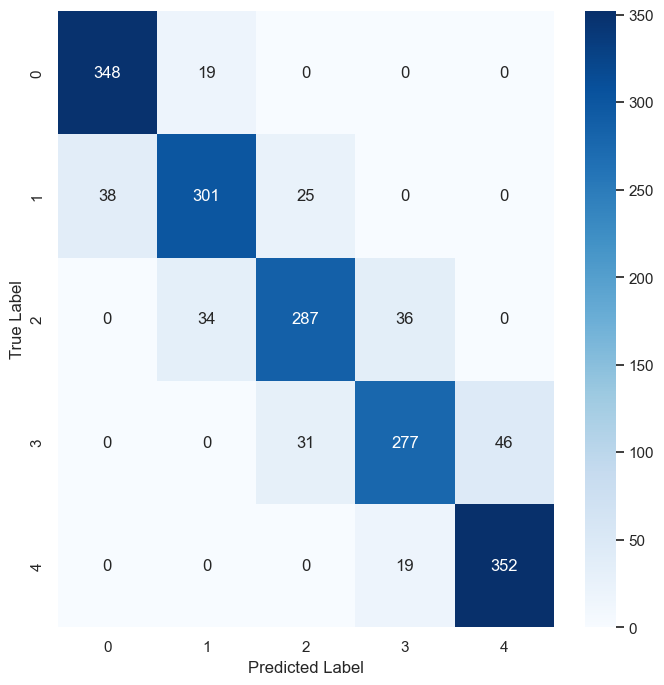

In [653]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [656]:
# 대각선 합(맞춘 샘플 수) / 전체 샘플 수 
(348+301+287+277+352) / 1813


0.8632101489244346

In [655]:
print(classification_report(np.argmax(y_test_one_hot, axis = 1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       367
           1       0.85      0.83      0.84       364
           2       0.84      0.80      0.82       357
           3       0.83      0.78      0.81       354
           4       0.88      0.95      0.92       371

    accuracy                           0.86      1813
   macro avg       0.86      0.86      0.86      1813
weighted avg       0.86      0.86      0.86      1813

